In [71]:
import os
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.preprocessing import LabelEncoder

# Librerias para graficar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [72]:
#  LAB 02, 31/08/23
#  https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
##

datos = pd.read_csv('/content/Housing.csv')
#datos.head()
datos.info() # Muestra la informacion, para verificar que todos los datos esten completos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [73]:

# cols categoricas (object), para convertir a numericas
columnas_categoricas = datos.select_dtypes(include=['object']).columns
for columna in columnas_categoricas:
  le = LabelEncoder()
  datos[columna] = le.fit_transform(datos[columna])

In [74]:
# ordenamos las columnas y Leemos los datos de cols
col = datos.pop("price")
datos.insert(len(datos.columns), "price", col)

# print(datos)
datos.info()

X = datos.iloc[:, :12]
y = datos.iloc[:, 12]
m = y.size

x_normal = X #para usar en la normal
datos_prueba = [1, 9960, 4, 2, 3, 1, 1, 0, 0, 1, 2, 0, 1]

#print(X)
#print('='*25)
#print(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   area              545 non-null    int64
 1   bedrooms          545 non-null    int64
 2   bathrooms         545 non-null    int64
 3   stories           545 non-null    int64
 4   mainroad          545 non-null    int64
 5   guestroom         545 non-null    int64
 6   basement          545 non-null    int64
 7   hotwaterheating   545 non-null    int64
 8   airconditioning   545 non-null    int64
 9   parking           545 non-null    int64
 10  prefarea          545 non-null    int64
 11  furnishingstatus  545 non-null    int64
 12  price             545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [75]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [76]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print('___Media calculada___' )
print( mu)
print('___Desviación estandar calculada___')
print(sigma)
print(X_norm)

___Media calculada___
area                5150.541284
bedrooms               2.965138
bathrooms              1.286239
stories                1.805505
mainroad               0.858716
guestroom              0.177982
basement               0.350459
hotwaterheating        0.045872
airconditioning        0.315596
parking                0.693578
prefarea               0.234862
furnishingstatus       1.069725
dtype: float64
___Desviación estandar calculada___
area                2168.149153
bedrooms               0.737386
bathrooms              0.502008
stories                0.866696
mainroad               0.348315
guestroom              0.382497
basement               0.477114
hotwaterheating        0.209207
airconditioning        0.464753
parking                0.860795
prefarea               0.423913
furnishingstatus       0.760674
dtype: float64
         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0    1.046726  1.403419   1.421812  1.378217  0.405623  -0.465315

In [77]:
# Añade el termino de interseccion a X (cols de 1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [78]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]     # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [79]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]        # numero de ejemplos de entrenamiento
    theta = theta.copy()  # realiza una copia de theta
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

theta calculado por el descenso por el gradiente:: 
[4734691.52675022  518850.44707468  104918.58420108  492019.44193145
  377071.10110775  154292.47065797  121242.22406054  160150.99306642
  180391.74418844  398061.51616787  244216.63142301  275019.37213044
 -163402.23355848]

El valor predecido es "por descenso por el gradiente"::  8237511.281424286




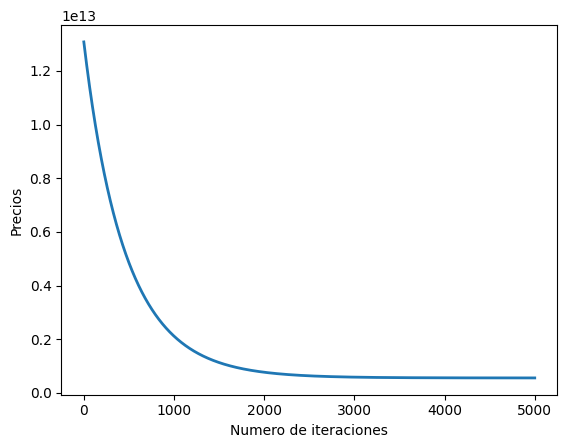

In [80]:
# Elegimos el valor mas adecuado para ALPHA
alpha = 0.001
num_iters = 5000

# Ejecutamos el descenso por el gradiente
theta = np.zeros(13)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia de los wins
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Precios')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente:: ')
print( str(theta))

X_array = datos_prueba.copy()

X_array[1:13] = (X_array[1:13] - mu) / sigma
wins = np.dot(X_array, theta)

print('\nEl valor predecido es "por descenso por el gradiente":: ', wins)
print('\n')

In [81]:
#
# Ecuacion de la norma
#

def calcularEcuacionNormal(X, y):
  theta = np.zeros(X.shape[1])
  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
  return theta


In [82]:

X_ren = np.concatenate([np.ones((m, 1)),  x_normal], axis=1)
theta = calcularEcuacionNormal(X_ren, y)


In [83]:

X_array = datos_prueba.copy()
wins = np.dot(X_array, theta)
print(f"Valores de theta son:: ", theta)
print('\n')
print('Victorias: usando la ecuación de la normal:: ', wins)


Valores de theta son::  [ 1.01866513e+05  2.43906887e+02  1.19474386e+05  9.88888287e+05
  4.50391518e+05  4.23100741e+05  2.98030507e+05  3.57926360e+05
  8.72936027e+05  8.53633595e+05  2.79785637e+05  6.47055599e+05
 -2.13187781e+05]


Victorias: usando la ecuación de la normal::  8259176.119667907
